In [1]:
import pandas as pd
import re
import nltk
import os
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords

# NLTK stopword listesini indir (eğer daha önce indirilmemişse)
#nltk.download('stopwords')

# Set the path as tangible
os.chdir('..')

# Check current path 
print(os.getcwd())

# Visualization
from src.visualization import plot_frequency_heatmap

c:\Users\user\Documents\Python Projects\tangible


In [ ]:
# Read the text file
#file_path = 'data/ankara_oe/article_1977_1.txt'
file_path = 'data/ankara_oe/article_2024_4.txt'
base_name = os.path.basename(file_path)
document_name = os.path.splitext(base_name)[0]
print("Document: " + document_name)

# Metin dosyası
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

#stop_words = set(stopwords.words('turkish'))
custom_stopwords = set([
    "ama", "bir", "bu", "çok", "daha", "gibi", "için", "ile", "ise", "önemli",  "şu", "ve"
])

# Metni küçük harfe çevirme ve temizleme
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır

# Kelimeleri tokenize et ve stopword’leri kaldır
tokens = [word for word in text.split() if word not in custom_stopwords]

# Unigram, bigram ve trigramları oluştur
unigrams = tokens
#print(type(unigrams))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
quadrigram = list(ngrams(tokens, 4))

# Frekansları hesapla
unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)
quadrigram_freq = Counter(quadrigram)

# En sık geçenleri seç
#top_unigrams = unigram_freq.most_common(10)
top_bigrams = bigram_freq.most_common(10)
top_trigrams = trigram_freq.most_common(10)
top_quadrigrams = quadrigram_freq.most_common(10)

# Sonuçları DataFrame olarak hazırlama
df_unigram = pd.DataFrame(unigram_freq.items(), columns=["Unigram", "Frekans"]).sort_values(by="Frekans", ascending=False)

df_bigram = pd.DataFrame([" ".join(bigram) for bigram, freq in top_bigrams], columns=["Bigram"])
df_bigram["Frekans"] = [freq for bigram, freq in top_bigrams]

df_trigram = pd.DataFrame([" ".join(trigram) for trigram, freq in top_trigrams], columns=["Trigram"])
df_trigram["Frekans"] = [freq for trigram, freq in top_trigrams]

df_quadrigram = pd.DataFrame(quadrigram_freq.items(), columns=["Quadrigram", "Frekans"]).sort_values(by="Frekans", ascending=False)

# Unigramları Görüntüle
#print("\n🔹 Unigram Frekansları:")
#print(df_unigram)

# Bigramları Görüntüle
#print("\n🔹 Bigram Frekansları:")
#print(df_bigram)

# **Trigramları Görüntüle**
#print("\n🔹 Trigram Frekansları:")
#print(df_trigram)

# Quadrigramları Görüntüle
print("\n🔹 Quadrigram Frekansları:")
print(df_quadrigram)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform([text])

# Kelimelerin önem sırasına göre alınması
feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray().flatten()

# En önemli kelimeleri sıralama
important_terms = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

# Tablo olarak gösterme
df_tfidf = pd.DataFrame(important_terms, columns=["Terim", "TF-IDF Skoru"])
df_tfidf = df_tfidf.sort_values(by="TF-IDF Skoru", ascending=False)
print(df_tfidf.shape)
print(df_tfidf)


In [2]:
# Anahtar Sözcükler
keywords = [
    "az",
    "bütünleştirme"
    "görme",
    "kaynaştırma",
    "otizm",
    "özel",
    "yetersizli",
    "zihin"
]

# **Önemli terimleri filtreleme (TF-IDF sonucundan)**
filtered_terms = [term for term, score in important_terms if any(keyword in term for keyword in keywords)]

# **Sonucu DataFrame olarak saklama**
df_filtered = pd.DataFrame(filtered_terms, columns=["Özel Eğitim Terimleri"])

# **Frekansları hesaplama (unigram, bigram, trigram içinde arama)**
filtered_frequencies = {}

for term in df_filtered["Özel Eğitim Terimleri"]:
    # Unigram frekansı
    unigram_count = unigram_freq.get(term, 0)
    # Bigram frekansı
    bigram_count = bigram_freq.get(tuple(term.split()), 0)
    # Trigram frekansı
    trigram_count = trigram_freq.get(tuple(term.split()), 0)

    # Toplam frekans
    total_count = unigram_count + bigram_count + trigram_count
    filtered_frequencies[term] = total_count

# **Yeni DataFrame oluştur (terimler ve frekansları)**
df_final = pd.DataFrame(filtered_frequencies.items(), columns=["Terim", "Frekans"])

# **Sonucu gösterme**
print("\n🔹 Filtrelenmiş Terimlerin Frekansları:")
print(df_final)


NameError: name 'important_terms' is not defined

In [2]:
# Read the text file
#file_path = 'data/ankara_oe/article_1977_1.txt'
file_path = 'data/ankara_oe/article_1977_1.txt'
base_name = os.path.basename(file_path)
document_name = os.path.splitext(base_name)[0]
print("Document: " + document_name)

# Metin dosyası
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

#stop_words = set(stopwords.words('turkish'))
custom_stopwords = set([
    "ama", "bir", "bu", "çok", "daha", "gibi", "için", "ile", "ise", "önemli",  "şu", "ve"
])

# Metni küçük harfe çevirme ve temizleme
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır

# Kelimeleri tokenize et ve stopword’leri kaldır
tokens = [word for word in text.split() if word not in custom_stopwords]

# 🔹 Analiz edilecek özel eğitim terimleri
special_ed_terms = [
    "arıza", "arızalı",
    "az gören",
    "bireysel", "bireysel farklılık", "bireyselleştirme", "bireyselleştirilmiş",
    "bireyselleştirilmiş eğitim", "bireysel eğitim",
    "bireyselleştirilmiş eğitim programı", "bireyselleştirilmiş eğitim planı",
    "destek eğitim", "destek eğitim odası", "kaynak oda",
    "dikkat eksikliği", "dikkat eksikliği ve hiperaktivite bozukluğu", "dikkat eksikliği ve hiperaktivite bozukluğu olan",
    "disleksi",
    "engel", "engelli", "engeli olan", "sakat",
    "görme engelli", "kör", "âmâ", "görme kaybı", "görme kayıplı", "görme kaybı olan", "görme özürlü", "görme engeli", "görme yetersizliği", "görme yetersizliği olan",
    "işitme engelli", "sağır", "ahraz", "işitme kaybı", "işitme kayıplı", "işitme kaybı olan", "işitme özürlü", "işitme engeli", "işitme yetersizliği", "işitme yetersizliği olan",
    "otizm", "otistik", "otizm spektrum bozukluğu",
    "özel eğitim",
    "özel eğitim hizmet",
    "özel gereksinim", "özel gereksinimli", "özel eğitime ihtiyacı olan", "özel eğitime muhtaç",
    "özür", "özürlü", "birden fazla özür",
    "rehabilitasyon",
    "yetersizlik", "yetersizliği olan",
    "zeka geriliği", "geri zekâlı", "geri zekalı",
    "zihin yetersizliği", "zihinsel yetersizlik", "zihin yetersizliği olan", "zihinsel yetersizliği olan"
]

# 🔹 Terimlerin frekanslarını hesaplama
term_frequencies = {}

for term in special_ed_terms:
    term_words = term.split()  # Terimi kelimelerine ayır
    term_length = len(term_words)  # Kaç kelimeden oluştuğunu öğren
    matched_positions = set()  # **Tekrar sayılmasını önlemek için bir set kullanıyoruz**

    # 🔹 Eğer terim tek kelimeden oluşuyorsa, başında geçtiği kelimeleri tarayalım
    if term_length == 1:
        base_word = term_words[0]  # Tek kelime
        for i in range(len(tokens)):
            if tokens[i].startswith(base_word):  # **Başlangıçta geçiyor mu?**
                matched_positions.add(i)

    # 🔹 Eğer terim birden fazla kelime içeriyorsa, son kelimenin başına eklenmiş halleri tarayalım
    else:
        base_word = term_words[-1]  # **Son kelimeyi al**
        for i in range(len(tokens) - term_length + 1):
            if tokens[i:i + term_length - 1] == term_words[:-1] and tokens[i + term_length - 1].startswith(base_word):
                matched_positions.add(i)

    # **Frekansı kaydet**
    term_frequencies[term] = len(matched_positions)

# **Sonuçları DataFrame olarak kaydet**
df_special_terms = pd.DataFrame(term_frequencies.items(), columns=["Terim", "Frekans"]).sort_values(by="Frekans", ascending=False)
df_special_terms['Source'] = document_name

# **Sonuçları gösterme**
print("\n🔹 Özel Eğitim Terimlerinin Frekansları:")
print(df_special_terms[df_special_terms["Frekans"] > 0])
print(df_special_terms[df_special_terms["Frekans"] > 0].shape)

# CSV dosyasına kaydet
"""csv_path = 'data/ankara_oe/word_frequencies_ankara.csv'
if not os.path.exists(csv_path):
    # CSV yoksa oluştur (header dahil)
    df_special_terms.to_csv(csv_path, index=False, encoding='utf-8')
else:
    # CSV varsa oku ve birleştir (append)
    existing_df = pd.read_csv(csv_path)
    combined_df = pd.concat([existing_df, df_special_terms], ignore_index=True)
    combined_df.to_csv(csv_path, index=False, encoding='utf-8')
"""


Document: article_1977_1

🔹 Özel Eğitim Terimlerinin Frekansları:
                         Terim  Frekans          Source
51                        özür       75  article_1977_1
45                 özel eğitim       71  article_1977_1
33                       sağır       58  article_1977_1
23                         kör       56  article_1977_1
58                 geri zekâlı       42  article_1977_1
0                        arıza       34  article_1977_1
21                       sakat       34  article_1977_1
52                      özürlü       20  article_1977_1
1                      arızalı       10  article_1977_1
55                 yetersizlik        8  article_1977_1
56           yetersizliği olan        7  article_1977_1
50         özel eğitime muhtaç        7  article_1977_1
54              rehabilitasyon        6  article_1977_1
2                     az gören        5  article_1977_1
59                 geri zekalı        4  article_1977_1
28                görme özürlü        

"csv_path = 'data/ankara_oe/word_frequencies_ankara.csv'\nif not os.path.exists(csv_path):\n    # CSV yoksa oluştur (header dahil)\n    df_special_terms.to_csv(csv_path, index=False, encoding='utf-8')\nelse:\n    # CSV varsa oku ve birleştir (append)\n    existing_df = pd.read_csv(csv_path)\n    combined_df = pd.concat([existing_df, df_special_terms], ignore_index=True)\n    combined_df.to_csv(csv_path, index=False, encoding='utf-8')\n"

     Year                Terim  Frekans
0    1977                ahraz        4
1    1977                arıza       34
2    1977              arızalı       10
3    1977             az gören        5
4    1977    birden fazla özür        1
..    ...                  ...      ...
123  2024  özel eğitime muhtaç        0
124  2024      özel gereksinim       40
125  2024    özel gereksinimli       31
126  2024                 özür        0
127  2024               özürlü        0

[128 rows x 3 columns]


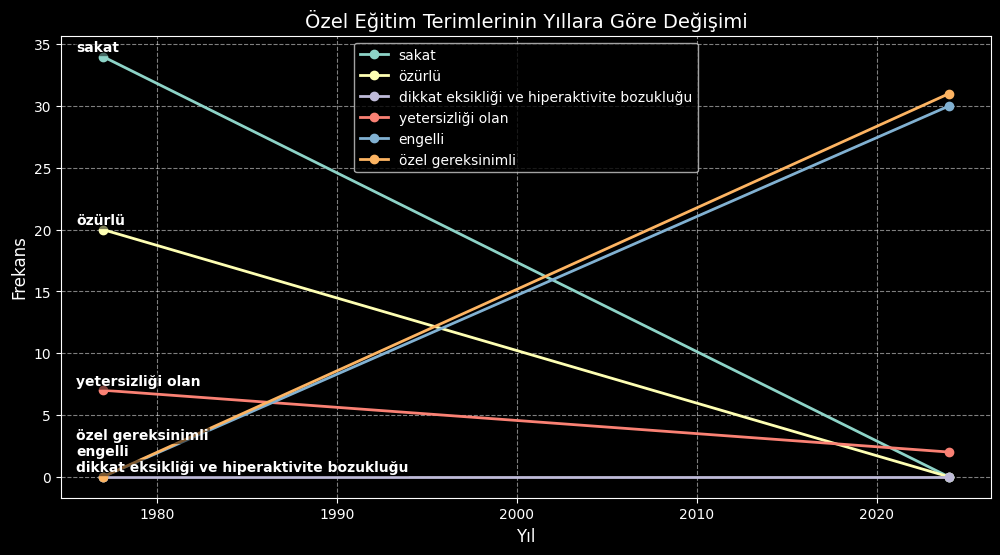

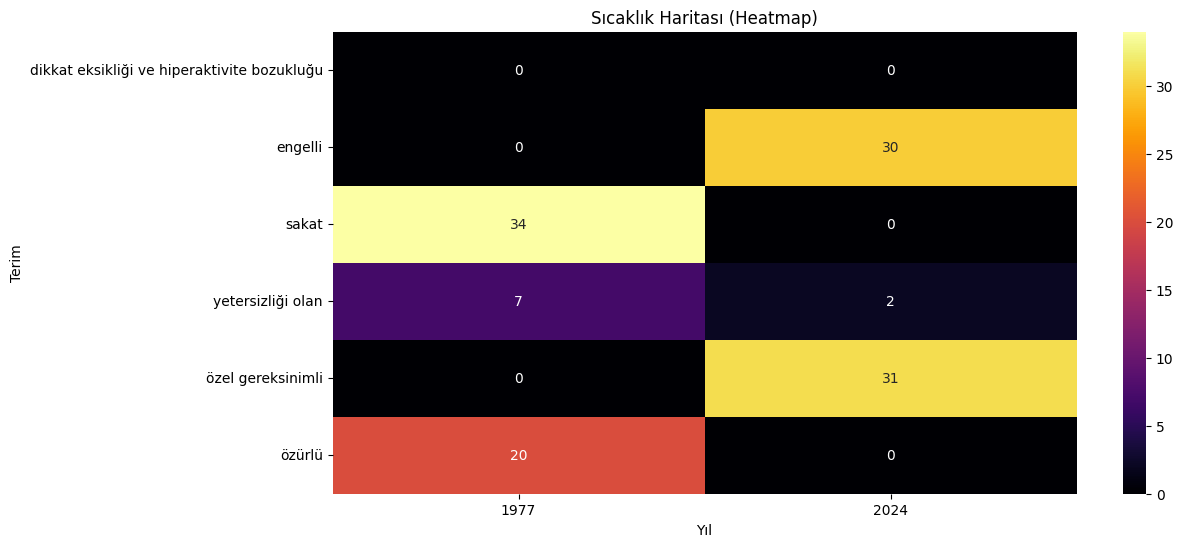

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme
file_path = "data/ankara_oe/word_frequencies_ankara.csv"
df = pd.read_csv(file_path)

# Yıl bilgisini Source sütunundan çıkartma
df["Year"] = df["Source"].str.extract(r"article_(\d{4})_")

# Yıla göre toplam frekans hesaplama
df_terms_yearly = df.groupby(["Year", "Terim"])["Frekans"].sum().reset_index()

# **Sonuçları gösterme**
print(df_terms_yearly)

# Analiz edilecek bazı terimleri seçme
selected_terms = ["özel gereksinimli", "engelli", "yetersizliği olan", "sakat", "özürlü", "dikkat eksikliği ve hiperaktivite bozukluğu"]

# Çizgi grafiği 
# Dark theme
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

plt.figure(figsize=(12, 6))

# Yıl sütununun integer olduğundan emin ol
df_terms_yearly["Year"] = df_terms_yearly["Year"].astype(int)

# **Son yılın frekanslarını hesapla ve en yüksekten en düşüğe sırala**
latest_year = df_terms_yearly["Year"].max()
last_year_frequencies = df_terms_yearly[df_terms_yearly["Year"] == latest_year].set_index("Terim")["Frekans"].to_dict()

# **Sıralama: En yüksek frekanstan en düşük frekansa**
sorted_terms = sorted(selected_terms, key=lambda t: last_year_frequencies.get(t, 0), reverse=False)

# **Etiketlerin üst üste binmesini önlemek için**
used_positions = set()
min_spacing = 1.3  # Etiketler arasında en az kaç birim boşluk olacak

for term in sorted_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.plot(subset["Year"], subset["Frekans"], marker="o", linestyle="-", linewidth=2, markersize=6, label=term)

    # İlk yılın değerini al
    first_row = subset.iloc[0]
    label_x = int(first_row["Year"])
    label_y = first_row["Frekans"]

    # **Eğer aynı y ekseninde başka bir etiket varsa, en yakın boş yeri bul ve kaydır**
    while label_y in used_positions:
        label_y += min_spacing

    used_positions.add(label_y)

    # **Etiketi ilk yılın içine biraz girintili yerleştir**
    plt.text(label_x - 1.5, label_y + 0.4, term, fontsize=10, ha="left", color="white", fontweight="bold",
             bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", boxstyle="round,pad=0.1"))

plt.xlabel("Yıl", fontsize=12, color="white")
plt.ylabel("Frekans", fontsize=12, color="white")
plt.title("Özel Eğitim Terimlerinin Yıllara Göre Değişimi", fontsize=14, color="white")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Bar grafiği
"""plt.figure(figsize=(12, 6))

for term in selected_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.bar(subset["Year"], subset["Frekans"], label=term, alpha=0.7)

plt.xlabel("Yıl")
plt.ylabel("Frekans")
plt.title("Özel Eğitim Terimlerinin Yıllara Göre Değişimi (Bar Grafiği)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")

#plt.show()
"""
# Alan Grafiği (Stacked Area Chart)
"""plt.figure(figsize=(12, 6))

for term in selected_terms:
    subset = df_terms_yearly[df_terms_yearly["Terim"] == term]
    plt.fill_between(subset["Year"], subset["Frekans"], alpha=0.6, label=term)

plt.xlabel("Yıl")
plt.ylabel("Frekans")
plt.title("Özel Eğitim Terimlerinin Yıllara Göre Değişimi (Alan Grafiği)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
"""
# Heatmap (Sıcaklık Haritası)
# Veriyi pivotlayarak heatmap'e uygun hale getirme
filtered_df_terms_yearly = df_terms_yearly[df_terms_yearly['Terim'].isin(selected_terms)]
df_pivot = filtered_df_terms_yearly.pivot(index="Terim", columns="Year", values="Frekans").fillna(0)

plot_frequency_heatmap(df_pivot, color_map="inferno", x_label="Yıl", y_label="Terim")

